In [ ]:
# !pip install oolearning --upgrade

In [5]:
import copy
import os
import oolearning as oo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from helpers import column_log, BinaryAucRocScore

pd.set_option('display.width', 500)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
width = 10
plt.rcParams['figure.figsize'] = [width, width/1.333]

In [2]:
csv_file = '../census.csv'
target_variable = 'income'

explore = oo.ExploreClassificationDataset.from_csv(csv_file_path=csv_file,
                                                   target_variable=target_variable)
negative_class = '<=50K'
positive_class = '>50K'

explore.dataset.head(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


In [3]:
pipeline = oo.TransformerPipeline([oo.CenterScaleTransformer(),
                                   oo.DummyEncodeTransformer(oo.CategoricalEncoding.ONE_HOT)])
pca_data = pipeline.fit_transform(explore.dataset.drop(columns=target_variable))
pca_data.shape

pca_transformer = oo.PCATransformer(percent_variance_explained=None)
pca_transformer.fit(data_x=pca_data)

pca_transformer.number_of_components, pca_transformer.cumulative_explained_variance

(103, array([0.16768118, 0.28790356, 0.39762699, 0.49547491, 0.58647921,
        0.65291064, 0.68497255, 0.71235329, 0.73640916, 0.75682309,
        0.77502571, 0.79256578, 0.80817257, 0.82254671, 0.8355174 ,
        0.84786432, 0.85964153, 0.86947868, 0.87907829, 0.8880795 ,
        0.89649325, 0.90430534, 0.91097758, 0.91699485, 0.92263162,
        0.92802047, 0.93293152, 0.93767263, 0.94229775, 0.94641279,
        0.95024304, 0.95399344, 0.95762437, 0.96116732, 0.96461471,
        0.96800017, 0.97099782, 0.97390148, 0.97646382, 0.97859931,
        0.9805846 , 0.98233304, 0.98392863, 0.98541022, 0.98687247,
        0.98826788, 0.98960171, 0.99059294, 0.99148611, 0.99210263,
        0.99266775, 0.9932189 , 0.99365744, 0.99405442, 0.99441736,
        0.9947772 , 0.9951048 , 0.99542712, 0.99572392, 0.99598936,
        0.99624207, 0.99647773, 0.99670584, 0.99692582, 0.99713909,
        0.99734714, 0.99754985, 0.99774543, 0.99793643, 0.99810508,
        0.99826173, 0.99841049, 0.99854572,

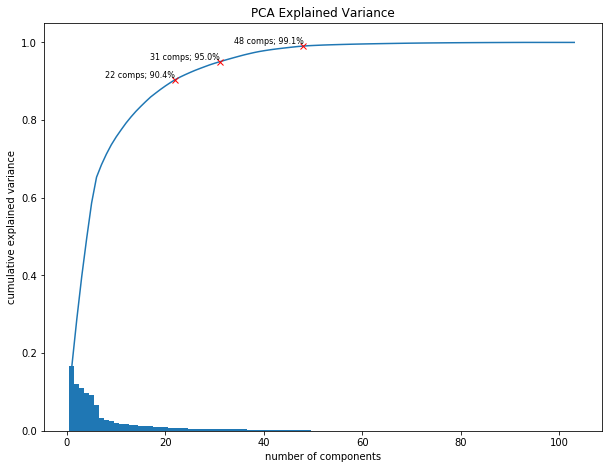

In [6]:
pca_transformer.plot_cumulative_variance()

In [7]:
global_transformations = [oo.ImputationTransformer(),
                          oo.StatelessColumnTransformer(columns=['capital-gain', 'capital-loss'],
                                                        custom_function=column_log),
                          oo.CenterScaleTransformer(),
                          oo.DummyEncodeTransformer(oo.CategoricalEncoding.ONE_HOT)]

In [ ]:
# get the expected columns at the time we do the training, based on the transformations
columns = oo.TransformerPipeline.get_expected_columns(transformations=global_transformations,
                                                      data=explore.dataset.drop(columns=[target_variable]))
# define the models and hyper-parameters that we want to search through
infos = [
         oo.ModelInfo(description='dummy_stratified',
                      model=oo.DummyClassifier(oo.DummyClassifierStrategy.STRATIFIED),
                      transformations=None, hyper_params=None, hyper_params_grid=None),
         oo.ModelInfo(description='dummy_frequent',
                      model=oo.DummyClassifier(oo.DummyClassifierStrategy.MOST_FREQUENT),
                      transformations=None, hyper_params=None, hyper_params_grid=None),
         oo.ModelInfo(description='Logistic Regression',
                      model=oo.LogisticClassifier(),
                      transformations=None,#[oo.RemoveCorrelationsTransformer()],
                      hyper_params=oo.LogisticClassifierHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          penalty=['l1', 'l2'],
                          regularization_inverse=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 100]))),
         oo.ModelInfo(description='Logistic Regression with PCA',
                      model=oo.LogisticClassifier(),
                      transformations=[oo.PCATransformer(percent_variance_explained=0.97)],
                      hyper_params=oo.LogisticClassifierHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          penalty=['l1', 'l2'],
                          regularization_inverse=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 100]))),
         oo.ModelInfo(description='SVM Linear',
                      model=oo.SvmLinearClassifier(), transformations=None,
                      hyper_params=oo.SvmLinearClassifierHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          penalty=['l2'],
                          penalty_c=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 100, 1000]))),
         oo.ModelInfo(description='SVM Linear with PCA',
                      model=oo.SvmLinearClassifier(),
                      transformations=[oo.PCATransformer(percent_variance_explained=0.97)],
                      hyper_params=oo.SvmLinearClassifierHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          penalty=['l2'],
                          penalty_c=[0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 100, 1000]))),
         # oo.ModelInfo(description='SVM Poly',
         #              model=oo.SvmPolynomialClassifier(),
         #              transformations=None,
         #              hyper_params=oo.SvmPolynomialClassifierHP(),
         #              hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
         #                  degree=[2, 3],
         #                  coef0=[0, 1, 10],
         #                  penalty_c=[0.001, 0.1, 100, 1000]))),
         # oo.ModelInfo(description='SVM Linear (class weights)',
         #              model=oo.SvmLinearClassifier(class_weights={negative_class: 0.3,
         #                                                          positive_class: 0.7}),
         #              transformations=None,
         #              hyper_params=oo.SvmLinearClassifierHP(),
         #              hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
         #                  penalty=['l2'],
         #                  penalty_c=[0.001, 0.01, 0.1, 1, 100, 1000]))),
         # oo.ModelInfo(description='SVM Poly (class weights)',
         #              model=oo.SvmPolynomialClassifier(class_weights={negative_class: 0.3,
         #                                                              positive_class: 0.7}),
         #              transformations=None,
         #              hyper_params=oo.SvmPolynomialClassifierHP(),
         #              hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
         #                  degree=[2, 3],
         #                  coef0=[0, 1, 10],
         #                  penalty_c=[0.001, 0.1, 100, 1000]))),
         oo.ModelInfo(description='Random Forest',
                      model=oo.RandomForestClassifier(),
                      transformations=None,
                      hyper_params=oo.RandomForestHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          criterion='gini',
                          max_features=[int(round(len(columns) ** (1 / 2.0))),
                                        25,
                                        int(round(len(columns) / 2)),
                                        75,
                                        len(columns) - 1],
                          n_estimators=[100, 250, 500, 1000],
                          min_samples_leaf=[1, 25, 50, 75, 100]))),
         oo.ModelInfo(description='Adaboost',
                      model=oo.AdaBoostClassifier(),
                      transformations=None,
                      hyper_params=oo.AdaBoostClassifierHP(),
                      hyper_params_grid=oo.HyperParamsGrid(params_dict=dict(
                          max_depth=[2, 3, 5, 10, 30],
                          n_estimators=[50, 100, 150, 500],
                          learning_rate=[0.01, 0.05, 0.1, 0.5]))),
         oo.ModelInfo(description='XGBoost',
                      model=oo.XGBoostClassifier(),
                      transformations=None,
                      hyper_params=oo.XGBoostTreeHP(objective=oo.XGBObjective.BINARY_LOGISTIC),
                      hyper_params_grid=oo.HyperParamsGrid(
                          params_dict=dict(colsample_bytree=[0.1, 0.25, 0.4, 0.7],
                                           subsample=[0.5, 0.75, 1.0],
                                           max_depth=[6, 9, 15, 20]))),
        ]

# infos[2].hyper_params_grid.params_grid
# infos[3].hyper_params_grid.params_grid
# infos[4].hyper_params_grid.params_grid
# infos[5].hyper_params_grid.params_grid
# infos[6].hyper_params_grid.params_grid
# infos[7].hyper_params_grid.params_grid
# infos[8].hyper_params_grid.params_grid
# infos[9].hyper_params_grid.params_grid

score_list = [BinaryAucRocScore(positive_class=positive_class, threshold=0.5),
              oo.AucRocScore(positive_class=positive_class),
              oo.FBetaScore(converter=oo.TwoClassThresholdConverter(threshold=0.5,
                                                                    positive_class=positive_class),
                            beta=0.5),
              oo.SensitivityScore(converter=oo.TwoClassThresholdConverter(threshold=0.5,
                                                                          positive_class=positive_class)),
              oo.PositivePredictiveValueScore(converter=oo.TwoClassThresholdConverter(threshold=0.5,
                                                                                      positive_class=positive_class))]
model_cache_directory = directory + 'searcher_fbeta_v1'
resampler_cache_directory = directory + 'searcher_fbeta_v1_resample_cache'

print()
print(model_cache_directory)
import multiprocessing
# multiprocessing.cpu_count()
searcher = oo.ModelSearcher(global_transformations=[t.clone() for t in global_transformations],
                            model_infos=infos,
                            splitter=oo.ClassificationStratifiedDataSplitter(holdout_ratio=0.25),
                            resampler_function=lambda m, mt: oo.RepeatedCrossValidationResampler(
                                model=m,
                                transformations=mt,
                                scores=[s.clone() for s in score_list],
                                folds=5,
                                repeats=5),
                            model_persistence_manager=oo.LocalCacheManager(cache_directory=model_cache_directory),
                            resampler_persistence_manager=oo.LocalCacheManager(cache_directory=resampler_cache_directory),
                            parallelization_cores=0)
                            #parallelization_cores=multiprocessing.cpu_count()-2)
searcher._parallelization_cores
searcher.search(data=explore.dataset, target_variable='income')

searcher.results.model_descriptions

# searcher.results.model_names

searcher.results.plot_resampled_scores(score_name='BINARY_AUC')
searcher.results.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
searcher.results.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)
searcher.results.plot_holdout_scores()

temp = searcher.results.best_tuned_results

log_tuner = searcher.results.tuner_results[2]
log_tuner.plot_resampled_scores(score_name='BINARY_AUC')
log_tuner.plot_hyper_params_profile(score_name='BINARY_AUC',
                                    x_axis='regularization_inverse',
                                    line='penalty')

log_tuner.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
log_tuner.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)

log_tuner.plot_hyper_params_profile(metric=oo.Metric.AUC_ROC,
                                    x_axis='regularization_inverse',
                                    line='penalty')

svm_tuner = searcher.results.tuner_results[3]
svm_tuner.plot_resampled_scores(score_name='BINARY_AUC')
svm_tuner.plot_hyper_params_profile(score_name='BINARY_AUC',
                                    x_axis='max_depth',
                                    line='n_estimators',
                                    grid='learning_rate')


svm_tuner.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
svm_tuner.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)

rf_tuner = searcher.results.tuner_results[4]
rf_tuner.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
rf_tuner.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)
rf_tuner.plot_hyper_params_profile(metric=oo.Metric.AUC_ROC,
                                    x_axis='max_features',
                                    line='min_samples_leaf',
                                    grid='n_estimators')

ada_tuner = searcher.results.tuner_results[5]
ada_tuner.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
ada_tuner.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)
ada_tuner.plot_hyper_params_profile(metric=oo.Metric.AUC_ROC,
                                    x_axis='max_depth',
                                    line='learning_rate',
                                    grid='n_estimators')

xgb_tuner = searcher.results.tuner_results[6]
temp = xgb_tuner._tune_results_objects.iloc[0].resampler_object.resampled_scores
temp.AUC_ROC.mean()
temp.AUC_ROC.std()
xgb_tuner.resampled_stats
xgb_tuner.plot_resampled_scores(metric=oo.Metric.AUC_ROC)
xgb_tuner.plot_resampled_scores(metric=oo.Metric.FBETA_SCORE)
xgb_tuner.plot_hyper_params_profile(metric=oo.Metric.AUC_ROC,
                                    x_axis='max_depth',
                                    line='subsample',
                                    grid='colsample_bytree')